# Real estate price

In [1]:
import pandas as pd
# url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/Real%20estate.csv'
df = pd.read_csv('Real_estate.csv')

In [2]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df = df.drop(['No','X5 latitude','X6 longitude'], axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [4]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [6]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


### Dataset Explanation

1. **X1 transaction date** (`int32`):  
   - Represents the year of the transaction, indicating when the real estate sale occurred.  
   - Example: 2012 or 2013.

2. **X2 house age** (`float64`):  
   - The age of the house in years at the time of the transaction.  
   - Example: 32.0 means the house is 32 years old.

3. **X3 distance to the nearest MRT station** (`float64`):  
   - The distance from the house to the nearest MRT station, measured in meters.  
   - Example: 84.87882 meters.

4. **X4 number of convenience stores** (`int64`):  
   - The number of convenience stores within a certain vicinity of the house.  
   - Example: 10 means there are 10 convenience stores nearby.

5. **Y house price of unit area** (`float64`):  
   - The price per unit area (e.g., per square meter) of the house during the transaction.  
   - Example: 37.9 means 37.9 currency units per square meter.


# Continue....

### Steps for Regression Analysis

#### **1. Split the Dataset**
- Split the data into **training (70%)** and **testing (30%)** subsets.
- Use the `train_test_split` function to ensure randomness in the split.
- Define:
  - **Features (X)**: `X1 transaction date`, `X2 house age`, `X3 distance to the nearest MRT station`, `X4 number of convenience stores`.
  - **Target (Y)**: `Y house price of unit area`.

#### **2. Check Correlation**
- Compute the correlation matrix to understand the relationships between features and the target variable.
- Visualize the correlation matrix using a **heatmap**:
  - Strong correlations between features and the target suggest potential predictors.
  - Identify multicollinearity (strong correlations between features), which might affect regression models.

#### **3. Apply Regression Models**

**a. Linear Regression**
1. Train a **Linear Regression** model using the training data.
2. Predict the target values using the testing data.

**b. Polynomial Regression**
1. Use `PolynomialFeatures` to generate polynomial terms for the features (e.g., degree = 2 or 3).
2. Train a **Linear Regression** model on the transformed polynomial features.
3. Predict the target values using the transformed testing data.

#### **4. Evaluate Model Performance**
- Evaluate both Linear and Polynomial Regression models using:
  1. **Mean Squared Error (MSE)**:
     - Measures the average squared difference between predicted and actual values.
     - Lower MSE indicates better performance.
  2. **R-squared (R²)**:
     - Measures how well the model explains the variability of the target variable.
     - Higher R² indicates better performance.
- Compare the results to determine which model performs better.

#### **5. Visualize Results**
- Plot **actual vs. predicted values** for both Linear and Polynomial Regression.
- For Polynomial Regression, visualize the curve fitting to see how well it models the data.


# Solution

## 1. Split the Dataset

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 

import warnings
warnings.filterwarnings("ignore")

In [9]:
Y=df.drop(['X1 transaction date','X2 house age', 'X3 distance to the nearest MRT station','X4 number of convenience stores'],axis=1)
X=df.drop(['Y house price of unit area'],axis=1)

In [10]:
pd.DataFrame(X).head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012,32.0,84.87882,10
1,2012,19.5,306.59470,9
2,2013,13.3,561.98450,5
3,2013,13.3,561.98450,5
4,2012,5.0,390.56840,5


In [11]:
pd.DataFrame(Y).head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=0)

## 2. Check Correlation¶

In [13]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X1 transaction date,1.000000,0.049171,0.016519,-0.005586,0.081545
X2 house age,0.049171,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.016519,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,0.081545,-0.210567,-0.673613,0.571005,1.000000


In [14]:
# X3 and X4 has relatively strong negative correlation

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

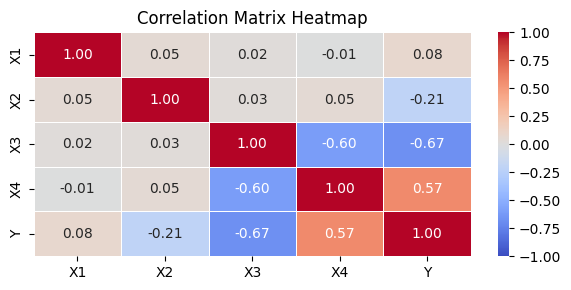

In [16]:
plt.figure(figsize=(6, 3))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            vmin=-1, 
            vmax=1,
            xticklabels=['X1', 'X2', 'X3', 'X4', 'Y'],  
            yticklabels=['X1', 'X2', 'X3', 'X4', 'Y'],
            fmt=".2f",  # Formats numbers to 2 decimal places
            linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# With help from deepseek

## 3. Apply Regression Models

### a. Linear Regression

In [17]:
lr=LinearRegression()
lr.fit(Xtrain,Ytrain)

LinearRegression()

In [18]:
lrpY=lr.predict(Xtest)
pd.DataFrame(lrpY).head()

,0
0,39.225157
1,13.632776
2,41.495669
3,13.256868
4,41.783139


### b. Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
PR=PolynomialFeatures(degree=3)
PR_X=PR.fit_transform(X)
PR_Xtest=PR.fit_transform(Xtest)

In [21]:
PR_X.shape

(414, 35)

In [22]:
PR_LR=LinearRegression()

In [23]:
PR_LR.fit(PR_X,Y)

LinearRegression()

In [24]:
PR_Y=PR_LR.predict(PR_Xtest)
pd.DataFrame(PR_Y).head()

,0
0,49.945465
1,7.025117
2,36.872545
3,5.285303
4,57.766772


## 4. Evaluate Model Performance

### MSE

In [25]:
#For LR
mse_LR = mean_squared_error(Ytest, lrpY)
mse_LR

np.float64(76.41725829919517)

In [26]:
#For PR
mse_PR=mean_squared_error(PR_Y,Ytest)
mse_PR

np.float64(128.50252577074755)

#### Linear Regression better for this dataset by MSE method

### R-squared (R²):

In [27]:
#For LR
r2_LR_tranning=lr.score(Xtrain,Ytrain)
r2_LR_testing=lr.score(Xtest,Ytest)
print("Tranning accuracy: ",r2_LR_tranning)
print("Testing accuracy: ",r2_LR_testing)

Tranning accuracy:  0.548303520798322
Testing accuracy:  0.5516056549613794


In [28]:
#For PR
r2_PR_tranning=PR_LR.score(PR_X, Y)
r2_PR_testing=PR_LR.score(PR_Xtest, Ytest)
print("Tranning accuracy: ",r2_PR_tranning)
print("Testing accuracy: ",r2_PR_testing)

Tranning accuracy:  0.21954336267236074
Testing accuracy:  0.24598438675743906


## 5. Visualize Results

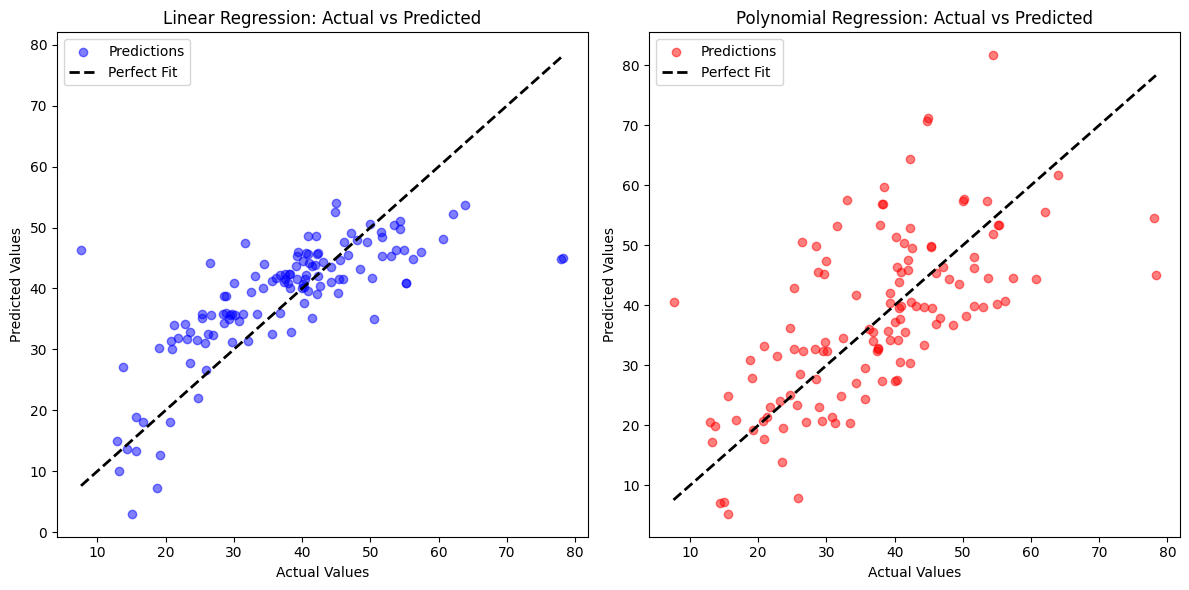

In [29]:
#For LR
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
plt.scatter(Ytest, lrpY, alpha=0.5, color='blue', label='Predictions')
plt.plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

#For PR
plt.subplot(1, 2, 2)  
plt.scatter(Ytest, PR_Y, alpha=0.5, color='red', label='Predictions')
plt.plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.legend()

plt.tight_layout()  
plt.show()

#Help of Ai